# Absolute Calibration

## Packages

# Jupiter Period Estimation


## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spectralpy as spc
from astropy import units as u
import astropy.constants as const

## Constants

In [2]:
## Constants 
BALMER = 6562.79                        #: H_alpha data from NIST
ERRBAL = 0.03                           #: its uncertainty
R = 71492 * u.km                        #: equat. radius of Jupiter from https://ssd.jpl.nasa.gov/horizons/app.html#/
DR = 4 * u.km                           #: its uncertainty
C = const.c.to(u.m/u.s)                 #: light velocity
PERIOD = (9+55/60+29.711/3600) * u.h    #: Sid. rot. period (III) of Jupiter from https://ssd.jpl.nasa.gov/horizons/app.html#/

## Open Data

Filename: /home/bernardo/Scrivania/FISICA/ASTROFISICA/Astr_Oss/Progetti/proj_3/data_files/18-04-22/giove/giove_spec.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (1392, 1040)   int16 (rescales to uint16)   
NEWS [568 791 0 None] [624 735 21 None]
Start [624 735 21 None]
N = 1040
K = 1
[624 735 21 None]
Start [624 735 21 None]
N = 1392
K = 3
[624 735 21 1392]
Start [568 791 0 None]
N = 1040
K = 1
[568 791 0 None]
Start [568 791 0 None]
N = 1392
K = 3
[568 791 0 1392]
[568 791 0 1392]
[624 735 21 1392]
 - HEADER -
SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 1392 /fastest changing axis                           
NAXIS2  =                 1040 /next to fastest changing axis                   
BSCALE  =   1.0

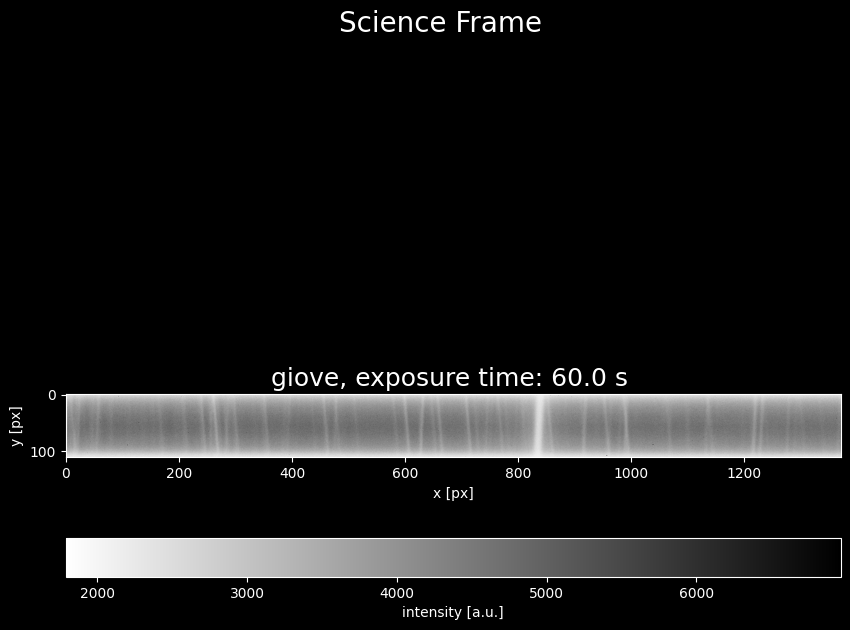

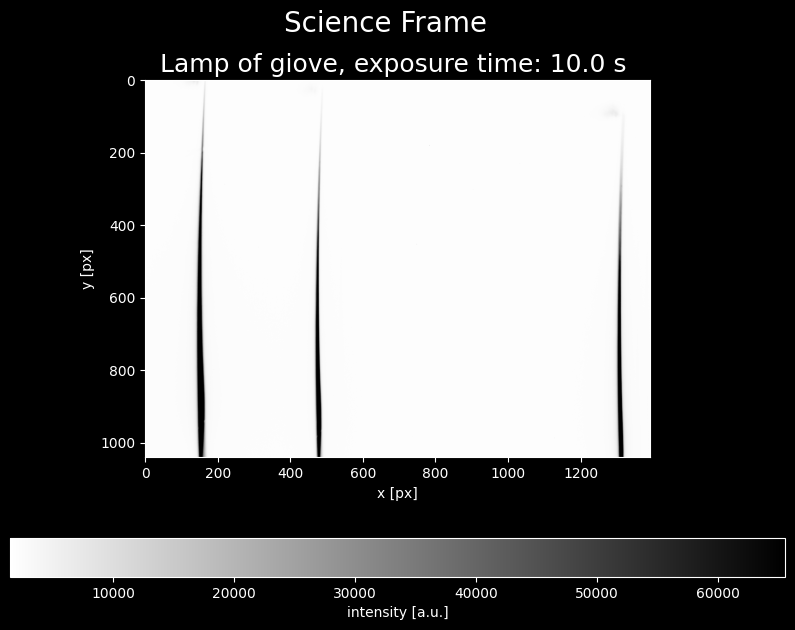

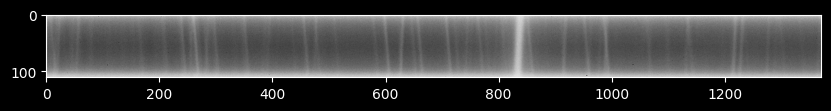

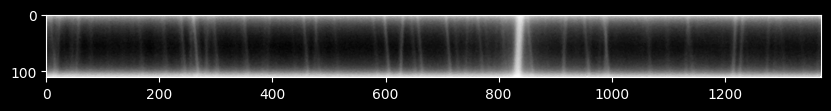

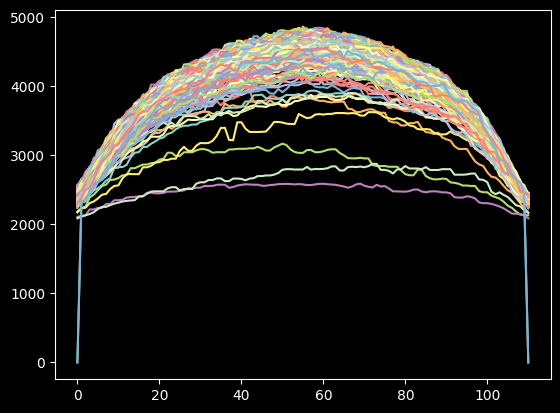

In [36]:
OBS_NIGHT = '18-04-22'
TARGET_NAME = 'giove'    
SELECTION = 0
fit_args = { 'mode': 'odr' }                #: parameters for the fit
lim_width = [[0,1391],[[0,112],[108,221]]]  #: coordinates of the ends of the spectrum
lag = 15                                    #: step length to collect xdata
# open and extract the fit file 
jupiter, lamp = spc.get_target_data(OBS_NIGHT,TARGET_NAME,SELECTION,angle=None,lim_width=lim_width,lag=lag,gauss_corr=False,lamp_incl=False, fit_args=fit_args, diagn_plots=False,norm='log',aspect='equal')


plt.figure(figsize=(10,7))
plt.imshow(jupiter.data,cmap='gray_r',norm='log')
from scipy.signal import medfilt2d
data = medfilt2d(jupiter.data.copy())
plt.figure(figsize=(10,7))
plt.imshow(data,cmap='gray_r',norm='log')
plt.show()

plt.figure()
for i in range(data.shape[1])[::5]:
    plt.plot(data[:,i])
plt.show()


## Inclination Correction

Take a column every `step` pixels, for each one fit a parabola, find the vertecies and fit a line to find the inclination angle


curve_fit
XERR [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Fit results:
	mode : curve_fit
	par0: -5.98e-01 +/- 2.6e-02  -->  4.32 %	init : -0.2
	par1: 6.86e+01 +/- 3.0e+00  -->  4.37 %	init : 1.0
	par2: 2.182e+03 +/- 9.1e+01  -->  4.15 %	init : 1.0
	corr_par0-par1	 = -0.95
	corr_par0-par2	 = 0.8
	corr_par1-par2	 = -0.94
	chi_sq = 238425.78  -->  red = 220764.61 %
	chi0 = 108.00 +/- 14.70  -->  "NO"
[[ 6.68031173e-04 -7.37613849e-02  1.86385851e+00]
 [-7.37613849e-02  9.00021770e+00 -2.54573672e+02]
 [ 1.86385851e+00 -2.54573672e+02  8.19803479e+03]]
curve_fit
XERR [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Fit results:
	mode 

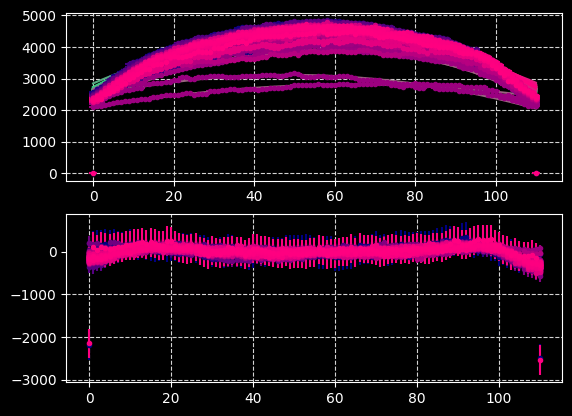

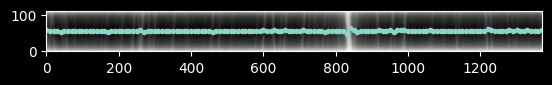

curve_fit
XERR None

Fit results:
	mode : curve_fit
	m: 1.52e-03 +/- 2.0e-04  -->  13.02 %	init : 0.0
	q: 5.469e+01 +/- 1.6e-01  -->  0.29 %	init : 5.6e+01
	corr_m-q	 = -0.87
	chi_sq = 1663.13  -->  red = 1222.89 %
	chi0 = 136.00 +/- 16.49  -->  "NO"
[[ 3.90348074e-08 -2.68069359e-05]
 [-2.68069359e-05  2.45941014e-02]]


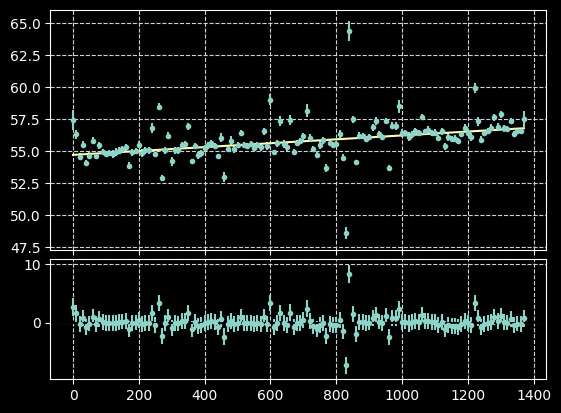

Angle2 = 8.7e-02 +/- 1.1e-02 deg ---> 13.02%
Angle_tot = 4.53e+00 +/- 4.0e-01 deg ---> 8.88%
[568 791 0 1392]
[624 735 21 1392]


In [37]:
## Parabola Fits
step = 10
N = data.shape[1]                   #: image horizontal size
col = np.arange(N)[::step]          #: selected columns
v  = []                             #: vertex coordinates of the parabolas for each column
Dv = []                             #: their uncertainties
xdata = np.arange(data.shape[0])
fig, ax = plt.subplots(2,1)
for i in col:
    ydata = data[:,i]
    # fit a parabola
    fit = spc.FuncFit(xdata=xdata,ydata=ydata,xerr=1)
    fit.pol_fit(2,[-0.2,1,1],mode='curve_fit')
    # extract the parameters and the covariances
    a,b,c = fit.fit_par
    cov = fit.res['cov']
    delta = b**2 - 4*a*c
    # compute the uncertainty related with the estimated vertex value
    der = [ b/(2*a**2),
            -1/(2*a) ]
    err = np.sqrt(np.sum([der[j]*der[k]*cov[j,k] for k in range(len(der)) for j in range(len(der))]))
    # store the results
    v  += [-b/2/a]
    Dv += [err]
    # plot
    color1 = (i/N,0,0.5)
    color2 = (i/N,1-i/N,0.5)
    fit.data_plot(ax[0],pltarg1={'color':color1},pltarg2={'color':color2})
    fit.residuals_plot(ax[1],color=color1)
plt.figure()
plt.imshow(data,origin='lower',norm='log',cmap='gray_r')
plt.errorbar(col,v,Dv,fmt='.-')
plt.show()

## Linear Fit
fit = spc.FuncFit(xdata=col,ydata=v,yerr=Dv)
fit.linear_fit([0,np.mean(v)],mode='curve_fit')
fit.plot(mode='subplots')
plt.show()
m  = fit.fit_par[0]
Dm = fit.fit_err[0]

# compute the inclination angle
angle  = np.arctan(m) * 180/np.pi
Dangle = Dm/(1+m**2)  * 180/np.pi
# print the value with the correct digits
spc.print_measure(angle,Dangle,'Angle2','deg')

# compute the total inclination angle
angle  = jupiter.angle[0] + angle
Dangle = np.sqrt(jupiter.angle[1]**2 + Dangle**2)
spc.print_measure(angle,Dangle,'Angle_tot','deg')
# rotate the image
jupiter.data = jupiter.hdul[0].data.copy()
jupiter = jupiter.rotate_target(angle)


## Period Estimation

$$ T = 8\pi \frac{R_G}{c} \frac{\lambda}{\Delta\lambda} \frac{x}{R_{px}} $$

[568 791 0 1392]
[624 735 21 1392]
curve_fit
XERR [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Fit results:
	mode : curve_fit
	k: 4.263e+03 +/- 1.2e+01  -->  0.28 %	init : 4.5e+03
	mu: 5.456e+01 +/- 6.9e-01  -->  1.27 %	init : 5.2e+01
	sigma: 6.06e+01 +/- 1.3e+00  -->  2.09 %	init : 2.0
	corr_k-mu	 = -0.032
	corr_k-sigma	 = -0.39
	corr_mu-sigma	 = 0.14
	chi_sq = 123745.33  -->  red = 122520.13 %
	chi0 = 101.00 +/- 14.21  -->  "NO"
curve_fit
XERR [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Fit results:
	mode : curve_fit
	k: 4.688e+03 +/- 1.2e+01  -->  0.25 %	init : 4.8e+03
	mu: 5.481e+01 +/- 5.7e-01  -->  1.05 %	init : 5.2e+01
	sigma: 5.526e+01 +/- 9.5e-01

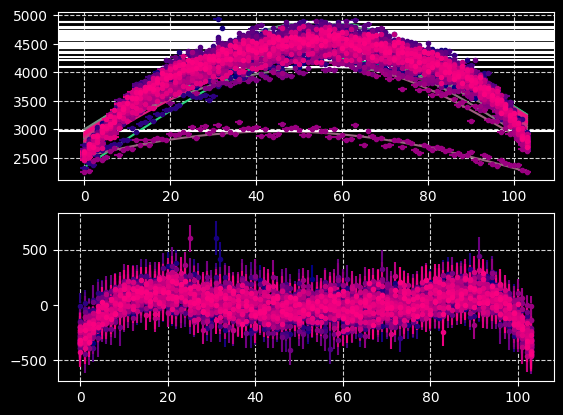

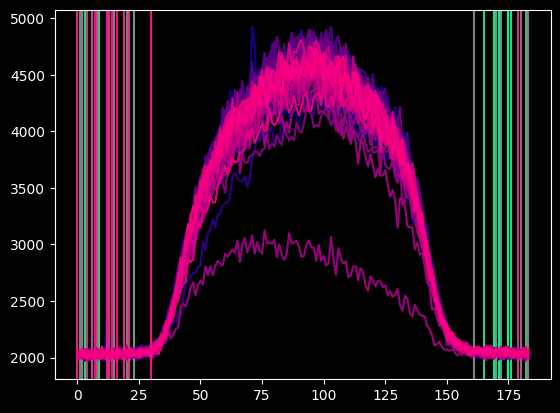

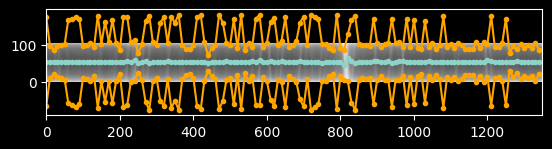

Centre = 5.440e+01 +/- 1.5e-01 pxs ---> 0.28%
Radius = 6.82e+01 +/- 3.1e+00 pxs ---> 4.55%


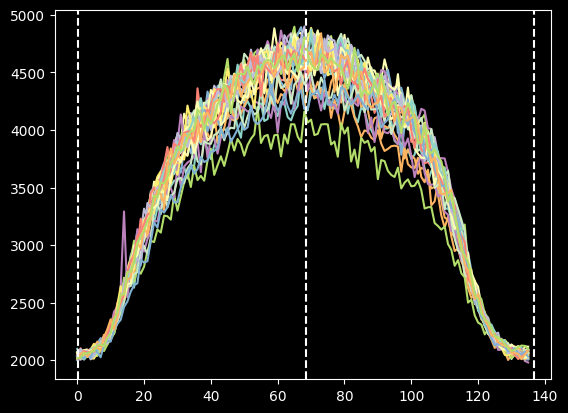

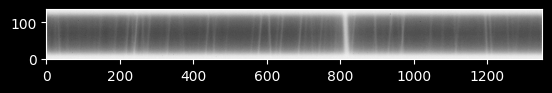

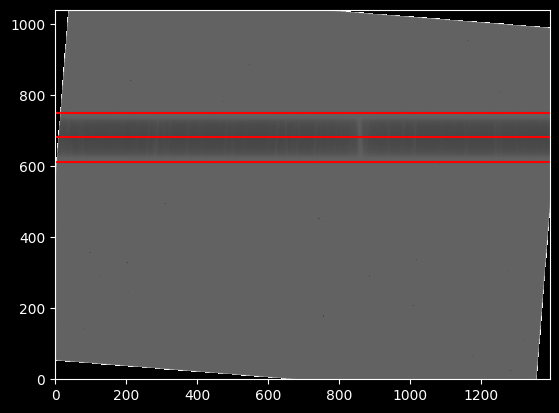

In [45]:
# store data before slicing
uncut_data = jupiter.data.copy()
cp_jup = jupiter.copy()
# ends of the slice
cp_jup.lims = [626,730,42,1391]
cp_jup.cut_image()
data = cp_jup.data.copy()

## Gaussian Fit 
step = 10
N = data.shape[1]                   #: image horizontal size
col = np.arange(N)[::step]          #: selected columns
c  = []                             #: coordinates of the centre for each column
Dc = []                             #: their uncertainties
r  = []                             #: radius estimations for each column
Dr = []                             #: their uncertainties
xdata = np.arange(data.shape[0])
# extend the ends of the sliced data 
ext_data = uncut_data[cp_jup.lims[0]-40 : cp_jup.lims[1]+40, cp_jup.lims[2]:].copy()
fig, ax = plt.subplots(2,1)
fig0, ax0 = plt.subplots(1,1)
for i in col:
    ydata = data[:,i]
    # fit a Gaussian
    fit = spc.FuncFit(xdata=xdata,ydata=ydata,xerr=1)
    fit.gaussian_fit([ydata.max(),xdata.mean(),2],mode='curve_fit')
    # extract the estimated paramters
    k,mu = fit.fit_par[:2]
    Dk,Dmu = fit.fit_err[:2]
    # store the center value
    c  += [mu]
    Dc += [Dmu]
    # find the distance at the 10%
    k10 = k / 10
    pos = np.argmin(abs(ext_data[:,i]-k10))
    # store the radius estimation
    r  += [abs(mu-pos)]
    Dr += [np.sqrt(Dmu**2 + 0.5**2)]
    # plot
    if i % 3 == 0:
        color1 = (i/N,0,0.5)
        color2 = (i/N,1-i/N,0.5)
        fit.data_plot(ax[0],pltarg1={'color':color1},pltarg2={'color':color2})
        fit.residuals_plot(ax[1],color=color1)
        ax[0].axhline(k,0,1)
        ax0.plot(ext_data[:,i],color=color1)
        ax0.axvline(pos,0,1,color=color2)
plt.figure()
plt.imshow(data,origin='lower',norm='log',cmap='gray_r')
plt.errorbar(col,c,Dc,fmt='.-')
plt.errorbar(col,np.array(c)+np.array(r),Dr,fmt='.-',color='orange')
plt.errorbar(col,np.array(c)-np.array(r),Dr,fmt='.-',color='orange')
plt.show()

# compute the mean and the STD
cen, Dcen = spc.mean_n_std(c)
rad, Drad = spc.mean_n_std(r) 
# rad = 76
# rad = 48
spc.print_measure(cen,Dcen,'Centre','pxs')
spc.print_measure(rad,Drad,'Radius','pxs')


## Slicing
# store the value of the 0 point
lim0 = cp_jup.lims[0] 
# compute the values in the coordinates of the full image
cen += lim0
top = cen + rad     #: top end of the planet in px 
low = cen - rad     #: bottom end of the planet in px 
# slice the data to the angular size of the planet
cp_jup.data = uncut_data.copy()
cp_jup.lims = [np.floor(low).astype(int),np.floor(top).astype(int),42,1391]
cp_jup.cut_image()
data = cp_jup.data.copy()

plt.figure()
for i in range(data.shape[1])[::50]:
    plt.plot(data[:,i])
plt.axvline(cen-cp_jup.lims[0],0,1,linestyle='--')
plt.axvline(top-cp_jup.lims[0],0,1,linestyle='--')
plt.axvline(low-cp_jup.lims[0],0,1,linestyle='--')
plt.show()

plt.figure()
plt.imshow(cp_jup.data,origin='lower',norm='log',cmap='gray_r')
plt.figure()
plt.imshow(uncut_data,origin='lower',norm='log',cmap='gray_r')
plt.axhline(cen,0,1,color='red')
plt.axhline(top,0,1,color='red')
plt.axhline(low,0,1,color='red')
plt.show()

## Lines Selection
# compute the position of the centre
mid = cen - cp_jup.lims[0]
Dmid = np.sqrt((2*Dcen)**2 + Drad**2)


### Select height

heights 11 125 (136, 1349)


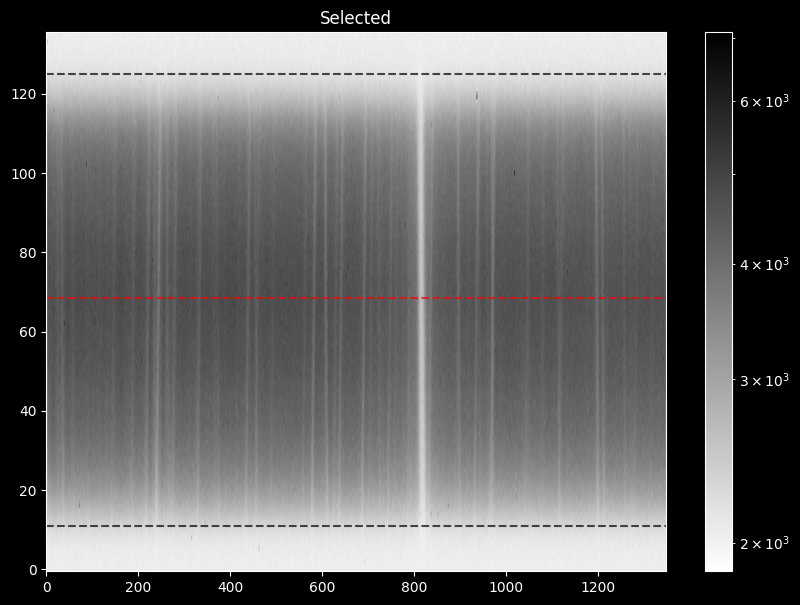

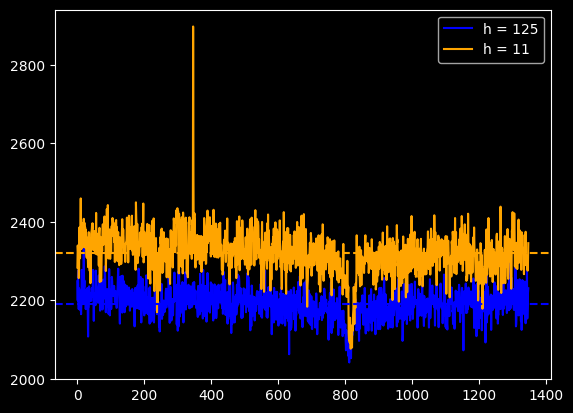

(1349,)


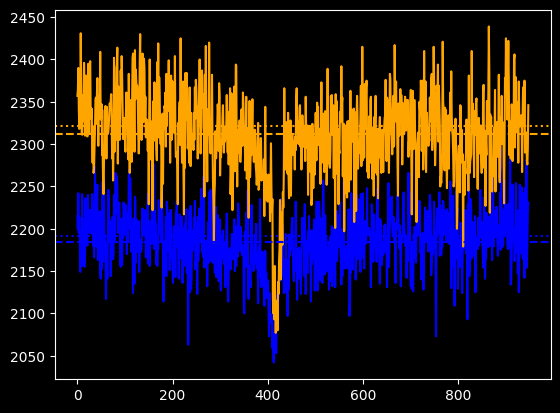

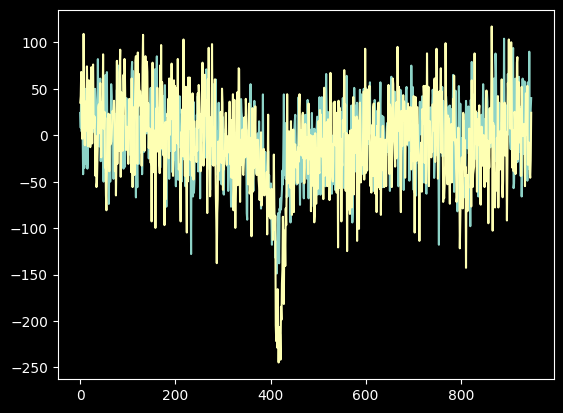

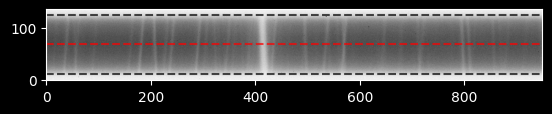

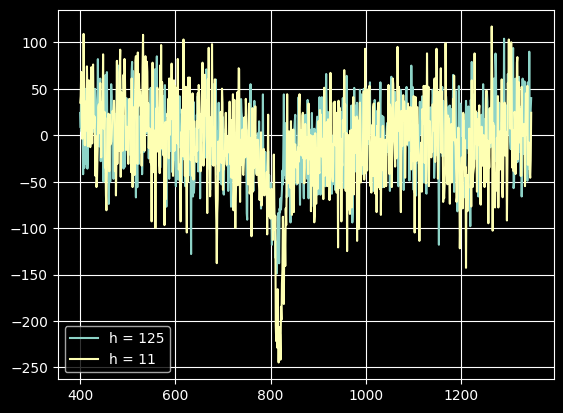

Left Shift -10
Right Shift 0
[-948  948]


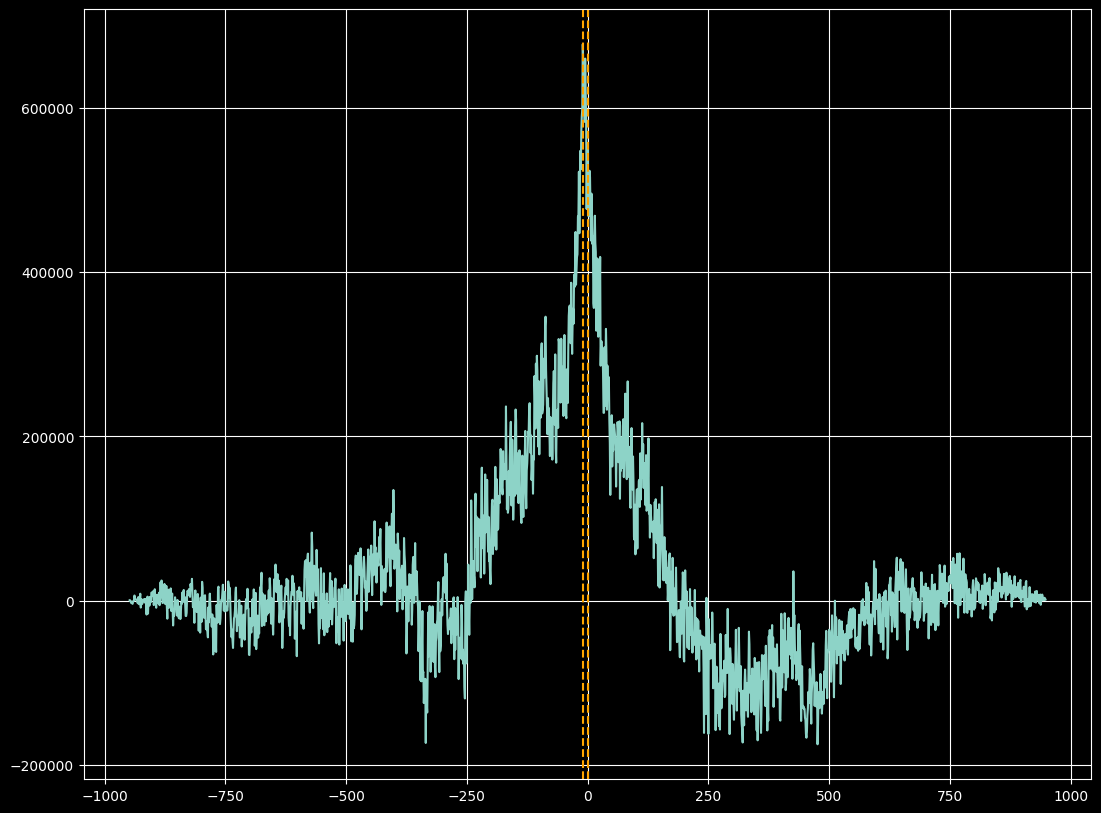

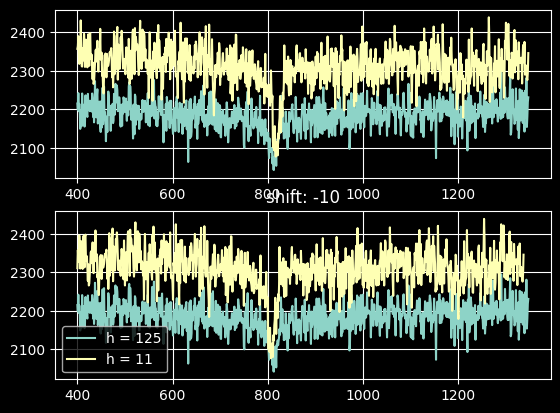

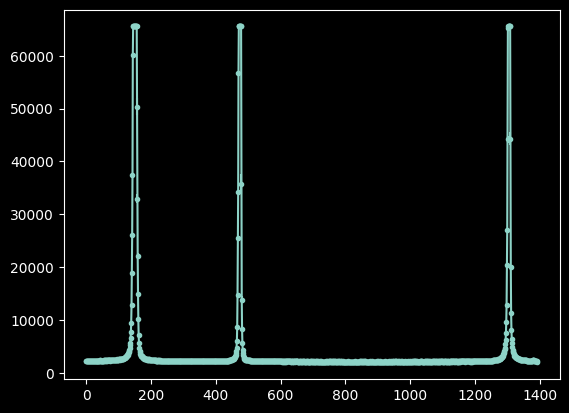

odr

Fit results:
	mode : odr
	m: 7.986e-02 +/- 4.0e-04  -->  0.51 %	init : 0.08
	q: 6.49479e+03 +/- 3.7e-01  -->  0.01 %	init : 0.0
	corr_m-q	 = -0.85
	chi_sq = 0.81  -->  red = 80.63 %
	chi0 = 1.00 +/- 1.41  -->  "OK"
[[ 1.6278983e-07 -1.2773595e-04]
 [-1.2773595e-04  1.3812510e-01]]


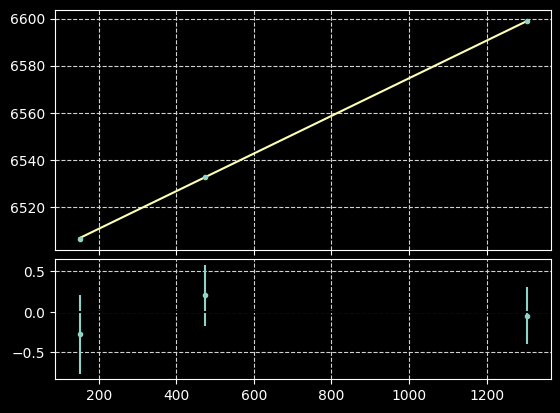


Shift1 : -10
13.681973375349008 h
Dl1 = 7.9857e-01 +/- 3.2e-04 AA ---> 0.04%
T1 = 1.151e+01 +/- 8.2e-01 h ---> 7.09%
omega1 = 1.52e-04 +/- 1.1e-05 1 / s ---> 7.09%
v_tan1 = 1.084e+01 +/- 7.7e-01 km / s ---> 7.09%
period = 9.92491972222222 h --> NO
diff = 1.9 sigma


In [58]:

# select two rows
bottom = 11
up = np.floor(2*mid - bottom).astype(int)
print('heights',bottom,up,data.shape) 
# compute the distance from the central row
h = mid - bottom
Dh = Dmid
if bottom > len(data): print('Oh no'); exit()

# average over 3 pixels
j1 = data[up]
j2 = data[bottom]
# j1 = np.mean(data[up-1:up+2],axis=0)
# j2 = np.mean(data[bottom-1:bottom+2],axis=0)

plt.figure(figsize=(10,7))
plt.title('Selected')
plt.imshow(data,cmap='gray_r',norm='log',origin='lower',aspect='auto')
plt.axhline(up,0,1,linestyle='dashed',color='black',alpha=0.7)
plt.axhline(mid,0,1,linestyle='dashed',color='red',alpha=0.7)
plt.axhline(bottom,0,1,linestyle='dashed',color='black',alpha=0.7)
plt.colorbar()
plt.figure()
plt.plot(j1,'-',label=f'h = {up}',color='b')
plt.plot(j2,'-',label=f'h = {bottom}',color='orange')
plt.axhline(j1.mean(),0,1,linestyle='dashed',color='b')
plt.axhline(j2.mean(),0,1,linestyle='dashed',color='orange')
plt.legend()
plt.show()

# select an interval
start, stop = 400, None
# start, stop = 790, 850
# check the ends
if stop is None:
    px_val = np.arange(start,data.shape[1])
elif stop > 0:
    px_val = np.arange(start,stop)
else:
    px_val = np.arange(start,data.shape[1]+stop)

print(j1.shape)

# store the data
j1_p = j1[slice(start,stop)].copy()
j2_p = j2[slice(start,stop)].copy()
# j2_p = data[int(mid)]
# remove the average
# j1 = j1_p - data.mean(axis=0)[slice(start,stop)]
# j2 = j2_p - data.mean(axis=0)[slice(start,stop)]
# j1 = j1_p - np.full(j1_p.shape,4000)
# j2 = j2_p - np.full(j1_p.shape,4000)
plt.figure()    
plt.axhline(j1.mean(),0,1,linestyle='dotted',color='b')
plt.axhline(j2.mean(),0,1,linestyle='dotted',color='orange')
j1 = j1_p - j1.mean()
j2 = j2_p - j2.mean()
# j1 = j1_p - np.full(j1_p.shape,4000)
# j2 = j2_p - np.full(j1_p.shape,4000)
# j1 = j1_p - data[int(mid)-1:int(mid)+2,slice(start,stop)].mean(axis=0)
# j2 = j2_p - data[int(mid)-1:int(mid)+2,slice(start,stop)].mean(axis=0)
plt.plot(j1_p,'-',label=f'h = {up}',color='b')
plt.plot(j2_p,'-',label=f'h = {bottom}',color='orange')
plt.axhline(j1_p.mean(),0,1,linestyle='dashed',color='b')
plt.axhline(j2_p.mean(),0,1,linestyle='dashed',color='orange')
plt.show()
plt.figure()
plt.plot(j1)
plt.plot(j2)
plt.show()
# j1 = j1_p - j1_p.mean()
# j2 = j2_p - j2_p.mean()

plt.figure()
plt.imshow(data[:,slice(start,stop)],cmap='gray_r',norm='log',origin='lower')
plt.axhline(up,0,1,linestyle='dashed',color='black',alpha=0.7)
plt.axhline(mid,0,1,linestyle='dashed',color='red',alpha=0.7)
plt.axhline(bottom,0,1,linestyle='dashed',color='black',alpha=0.7)
plt.figure()
plt.plot(px_val,j1,'-',label=f'h = {up}')
plt.plot(px_val,j2,'-',label=f'h = {bottom}')
plt.grid()
plt.legend()
plt.show()

## Doppler Shift
corr = np.correlate(j1,j2,mode='full')
lags = np.arange(len(corr)) - (len(j1)-1)
n_corr = np.where(lags <= 0, corr, 0)       #: correlation for negative lags only
p_corr = np.where(lags >= 0, corr, 0)       #: correlation for positive lags only
shift1 = lags[n_corr.argmax()]              #: left shift
shift2 = lags[p_corr.argmax()]              #: right shift
print('Left Shift' ,shift1)
print('Right Shift',shift2)
print(lags[[0,-1]])
plt.figure(figsize=(13,10))
plt.plot(lags,corr)
plt.axvline(shift1,0,1,color='orange',linestyle='--')
plt.axvline(shift2,0,1,color='orange',linestyle='--')
plt.grid()
plt.show()

j1 = j1_p.copy()
j2 = j2_p.copy()

plt.figure()
plt.subplot(2,1,1)
plt.plot(px_val,j1)
plt.plot(px_val,j2)
plt.grid()
if shift1 != 0:
    plt.subplot(2,1,2)
    plt.title(f'shift: {shift1}')
    plt.plot(px_val,j1,label=f'h = {up}')
    plt.plot(px_val[:shift1],j2[-shift1:],label=f'h = {bottom}')
    plt.grid()
    plt.legend()
plt.show()

## Wavelength Calibration
# average over 4 rows
heights = np.array([710+i*5 for i in range(4)])
lamp.spec, lamp.std = spc.mean_n_std(lamp.data[heights],axis=0)
plt.figure()
plt.errorbar(np.arange(*lamp.spec.shape),lamp.spec,lamp.std,fmt='.-')
plt.show()
# get data
lines, px, Dpx = spc.get_cal_lines(OBS_NIGHT,TARGET_NAME)
Dlines = lines/20000 / 2
# fit a line
m0 = np.mean(np.diff(lines)/np.diff(px))
fit = spc.FuncFit(xdata=px,xerr=Dpx,ydata=lines,yerr=Dlines)
fit.linear_fit([m0,0])
fit.plot(mode='subplots',points_num=3)
plt.show()
# store the parameter to convert px in AA
px_arm  = fit.fit_par[0]
Dpx_arm = fit.fit_err[0]

# px_arm = 0.115
## Period
def period(delta, index):
    print('\nShift'+index+' :',delta)
    delta  = px_arm * abs(delta)
    Ddelta = Dpx_arm * abs(delta)
    t0 = (8*np.pi * (R/C) * (BALMER/delta)).to(u.h)
    print(t0)
    t  = (8*np.pi * (R/C) * (BALMER/delta) * (h/rad)).to(u.h)
    Dt = t * np.sqrt( (DR/R)**2 + (ERRBAL/BALMER)**2 + (Ddelta/delta)**2 + (Drad/rad)**2 + (Dh/h)**2)
    w  = (2*np.pi / t).to(1 / u.s)
    Dw = w * Dt/t
    v  = (w*R).to(u.km/u.s)
    Dv = v * np.sqrt((Dw/w)**2 + (DR/R)**2)
    spc.print_measure(delta,Ddelta,'Dl'+str(index),'AA')
    spc.print_measure(t,Dt,'T'+str(index))
    spc.print_measure(w,Dw,'omega'+str(index))
    spc.print_measure(v,Dv,'v_tan'+str(index))
    acc_cond = t-Dt <= PERIOD <= t+Dt
    print(f'period = {PERIOD} -->', 'OK' if acc_cond else 'NO') 
    if not acc_cond:
        print(f'diff = {abs(PERIOD-t)/Dt:.2} sigma')
    return t, Dt
if shift1 != 0:
    p1 = period(shift1,'1')
